In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [8]:
# Load dataset
df = pd.read_csv("../data/uk_energy_data.csv")

In [9]:
display(df.head())

,datetime,temperature_C,humidity_%,wind_speed_mps,cloud_cover_%,solar_radiation_Wm2,pm10,pm2_5,co,no2,...,carbon_intensity_actual,carbon_intensity_forecast,carbon_index,retail_price_£_per_kWh,uk_gen_biomass_%,uk_gen_imports_%,uk_gen_gas_%,uk_gen_nuclear_%,uk_gen_solar_%,uk_gen_wind_%
0,2025-08-02 05:00:00+00:00,15.0,60,10.9,100,2.0,9.1,6.7,166,9.7,...,78,58,low,0.149940,12.9,21.5,12.3,16.9,1.1,35.2
1,2025-08-02 06:00:00+00:00,15.2,61,10.4,100,30.0,10.7,8.1,172,10.0,...,76,72,low,0.143325,9.7,21.7,12.3,16.7,5.8,33.7
2,2025-08-02 07:00:00+00:00,15.6,60,10.7,100,67.0,9.2,7.1,185,10.6,...,86,69,low,0.141330,7.8,24.5,12.0,15.1,12.4,28.3
3,2025-08-02 08:00:00+00:00,16.2,59,10.0,100,135.0,8.5,6.2,180,6.8,...,73,85,low,0.152145,8.1,23.7,7.7,14.1,20.8,25.6
4,2025-08-02 09:00:00+00:00,17.2,54,9.2,100,242.0,7.9,5.6,173,6.6,...,67,68,low,0.152145,6.9,22.3,7.3,13.2,26.9,23.3


In [10]:
display(df.tail())

,datetime,temperature_C,humidity_%,wind_speed_mps,cloud_cover_%,solar_radiation_Wm2,pm10,pm2_5,co,no2,...,carbon_intensity_actual,carbon_intensity_forecast,carbon_index,retail_price_£_per_kWh,uk_gen_biomass_%,uk_gen_imports_%,uk_gen_gas_%,uk_gen_nuclear_%,uk_gen_solar_%,uk_gen_wind_%
1934,2025-10-21 19:00:00+00:00,13.3,82,12.2,100,0.0,10.3,5.9,151,30.3,...,80,90,low,0.190995,8.6,8.0,45.5,10.9,9.8,17.2
1935,2025-10-21 20:00:00+00:00,13.0,82,12.3,73,0.0,10.6,6.3,153,26.9,...,66,65,low,0.154350,8.6,8.0,45.5,10.9,9.8,17.2
1936,2025-10-21 21:00:00+00:00,12.5,83,12.0,0,0.0,10.9,6.9,156,26.0,...,57,62,low,0.149940,8.6,8.0,45.5,10.9,9.8,17.2
1937,2025-10-21 22:00:00+00:00,11.7,86,11.1,73,0.0,11.4,7.5,156,25.6,...,59,53,low,0.144585,8.6,8.0,45.5,10.9,9.8,17.2
1938,2025-10-21 23:00:00+00:00,11.2,89,9.9,41,0.0,11.7,7.9,155,23.1,...,57,62,low,0.123480,8.6,8.0,45.5,10.9,9.8,17.2


In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   datetime                   1939 non-null   object 
 1   temperature_C              1939 non-null   float64
 2   humidity_%                 1939 non-null   int64  
 3   wind_speed_mps             1939 non-null   float64
 4   cloud_cover_%              1939 non-null   int64  
 5   solar_radiation_Wm2        1939 non-null   float64
 6   pm10                       1939 non-null   float64
 7   pm2_5                      1939 non-null   float64
 8   co                         1939 non-null   int64  
 9   no2                        1939 non-null   float64
 10  so2                        1939 non-null   float64
 11  o3                         1939 non-null   int64  
 12  aqi_us                     1939 non-null   int64  
 13  carbon_intensity_actual    1939 non-null   int64

None

In [12]:
print(df.isnull().sum())

datetime                     0
temperature_C                0
humidity_%                   0
wind_speed_mps               0
cloud_cover_%                0
solar_radiation_Wm2          0
pm10                         0
pm2_5                        0
co                           0
no2                          0
so2                          0
o3                           0
aqi_us                       0
carbon_intensity_actual      0
carbon_intensity_forecast    0
carbon_index                 0
retail_price_£_per_kWh       0
uk_gen_biomass_%             0
uk_gen_imports_%             0
uk_gen_gas_%                 0
uk_gen_nuclear_%             0
uk_gen_solar_%               0
uk_gen_wind_%                0
dtype: int64


In [13]:
display(df.describe())

,temperature_C,humidity_%,wind_speed_mps,cloud_cover_%,solar_radiation_Wm2,pm10,pm2_5,co,no2,so2,...,aqi_us,carbon_intensity_actual,carbon_intensity_forecast,retail_price_£_per_kWh,uk_gen_biomass_%,uk_gen_imports_%,uk_gen_gas_%,uk_gen_nuclear_%,uk_gen_solar_%,uk_gen_wind_%
count,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,...,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000
mean,16.581434,68.936050,10.829861,69.791645,141.824394,11.593141,7.362197,161.740588,17.705570,1.631563,...,33.602888,129.734399,129.842702,0.173524,7.791645,12.789995,28.358174,11.454100,7.146416,32.422228
std,3.915588,15.280961,5.222625,35.952740,199.701386,5.757838,4.648000,27.471822,13.201811,1.293576,...,12.209435,59.273692,62.012662,0.088188,3.459275,5.950007,15.416635,2.768203,9.806418,19.109959
min,7.700000,28.000000,0.400000,0.000000,0.000000,1.400000,0.900000,114.000000,1.700000,0.300000,...,16.000000,34.000000,29.000000,-0.045885,0.400000,0.000000,5.700000,6.800000,0.000000,1.700000
25%,13.750000,59.000000,7.200000,46.000000,0.000000,7.600000,4.300000,144.000000,8.800000,0.800000,...,25.000000,77.000000,75.000000,0.147735,5.000000,8.700000,14.800000,9.400000,0.000000,17.200000
50%,16.200000,71.000000,10.400000,88.000000,19.000000,10.100000,5.800000,156.000000,13.500000,1.200000,...,29.000000,123.000000,123.000000,0.171990,8.000000,12.500000,25.500000,11.000000,0.700000,28.500000
75%,19.000000,81.000000,14.000000,100.000000,240.500000,13.700000,8.800000,171.500000,21.550000,2.000000,...,39.000000,171.500000,176.000000,0.207270,10.250000,16.650000,39.400000,13.100000,12.400000,47.000000
max,30.700000,100.000000,30.300000,101.000000,834.000000,46.500000,35.500000,371.000000,86.900000,9.600000,...,89.000000,278.000000,285.000000,0.607635,16.200000,32.400000,69.800000,21.300000,43.300000,75.600000


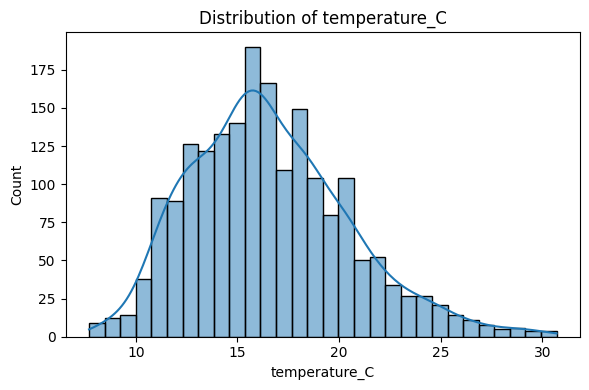

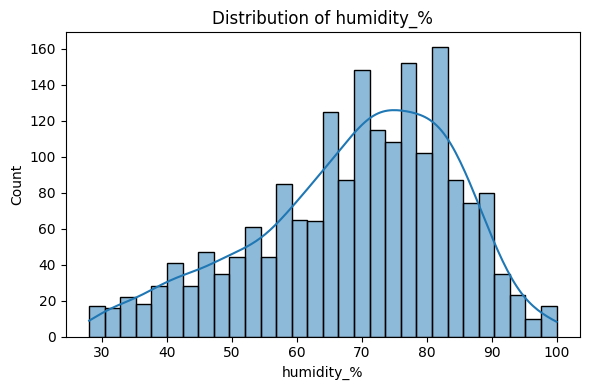

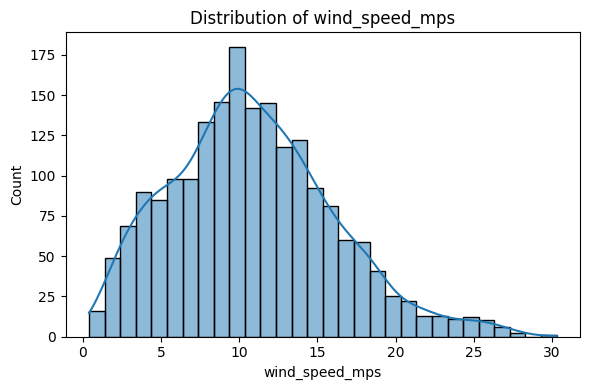

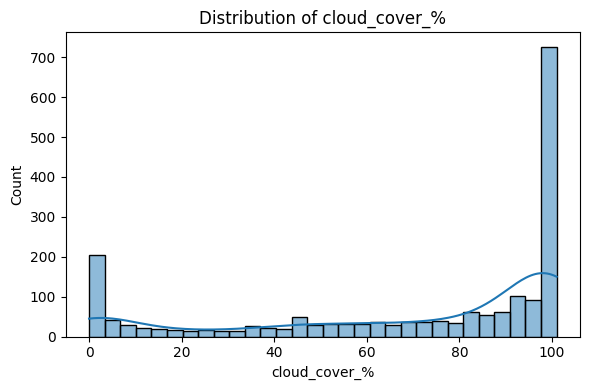

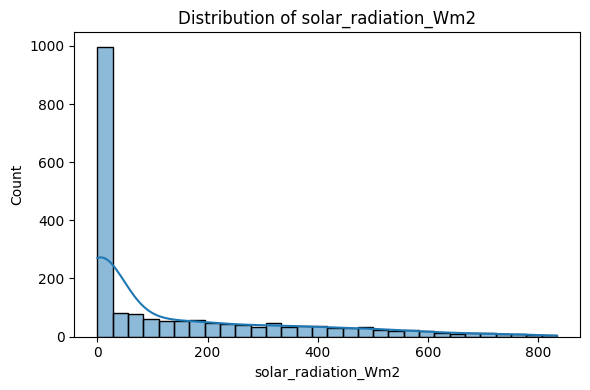

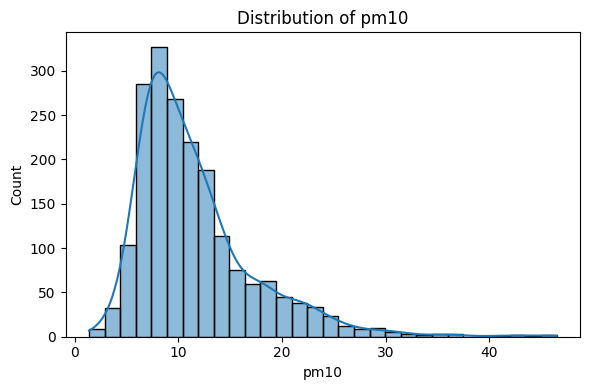

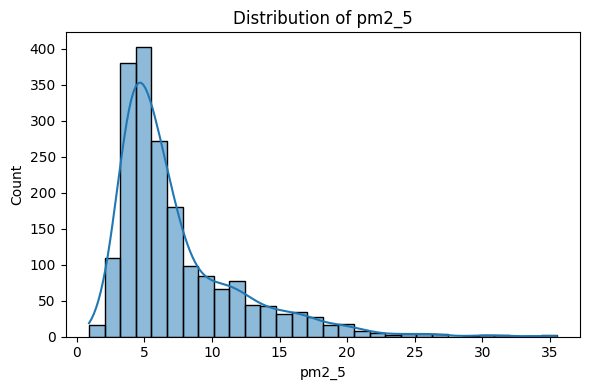

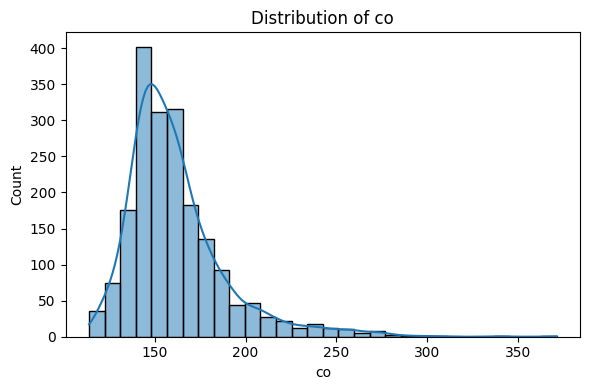

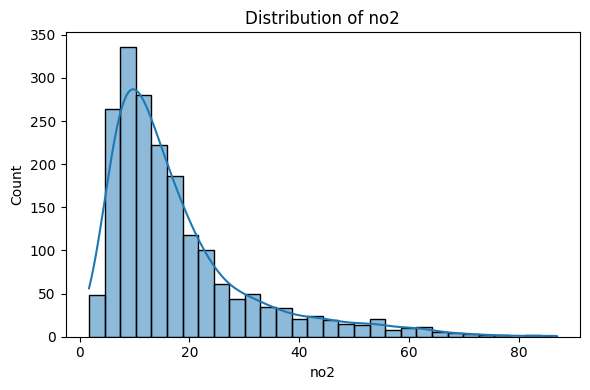

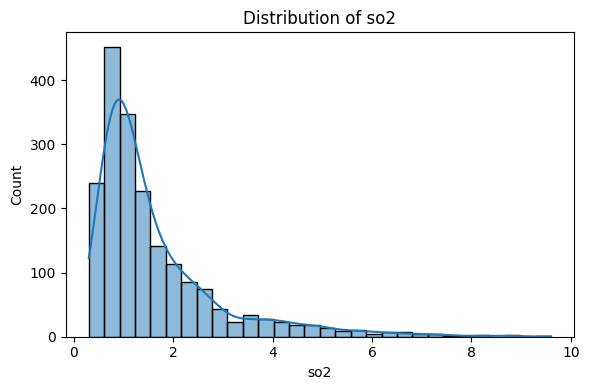

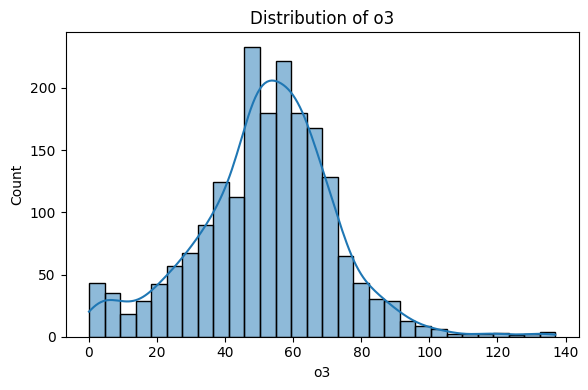

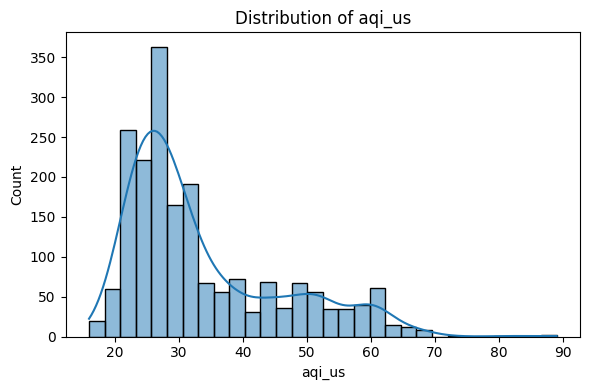

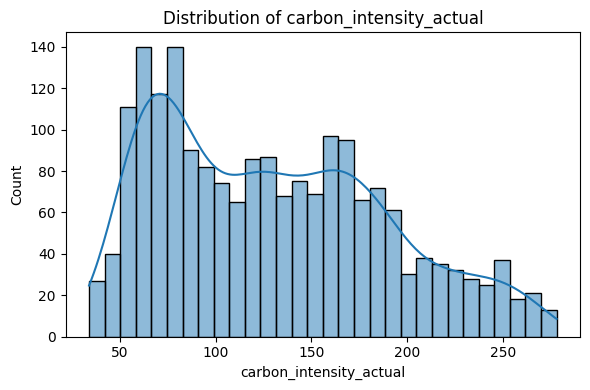

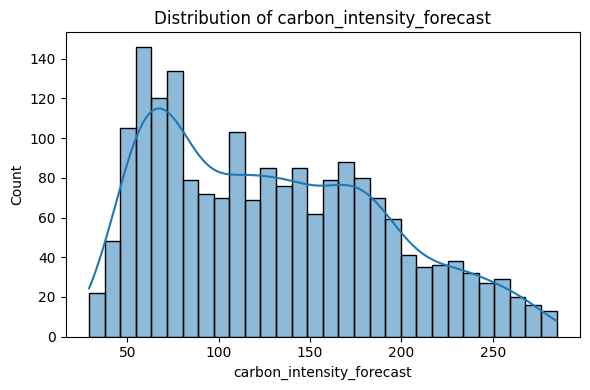

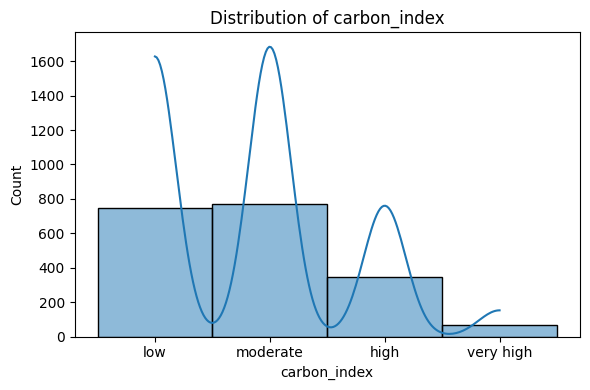

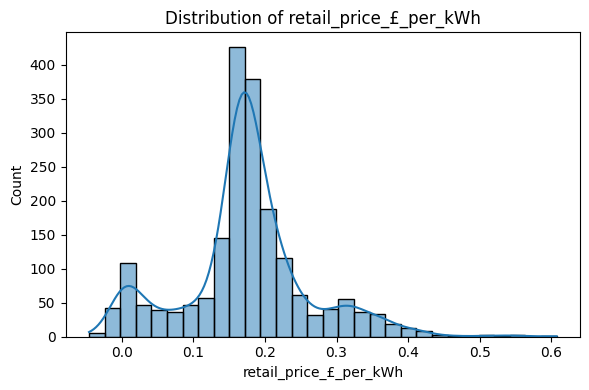

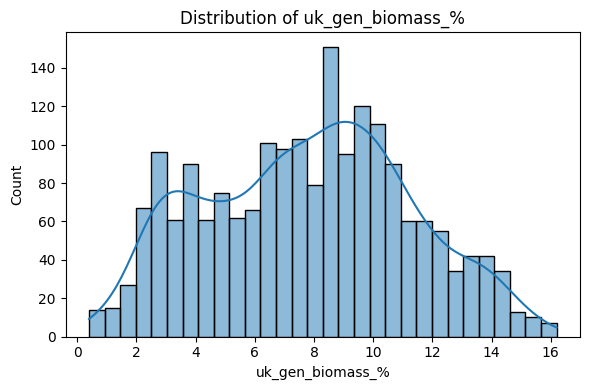

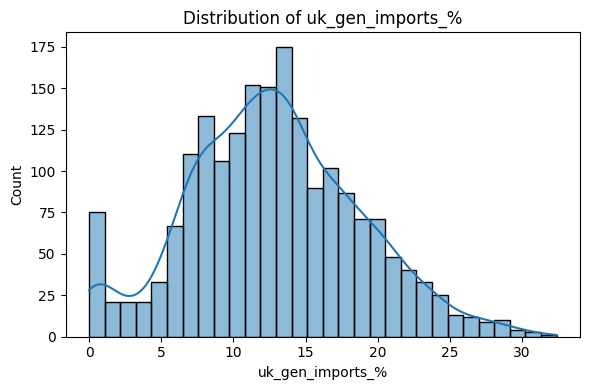

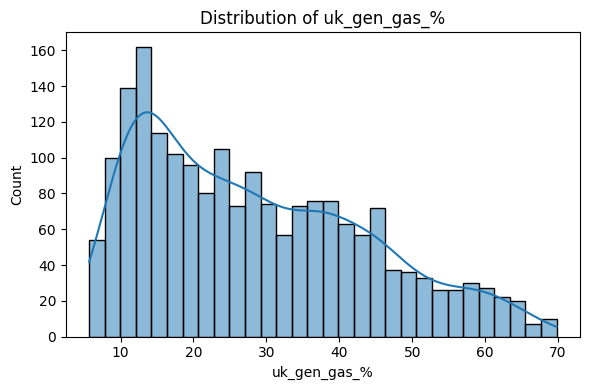

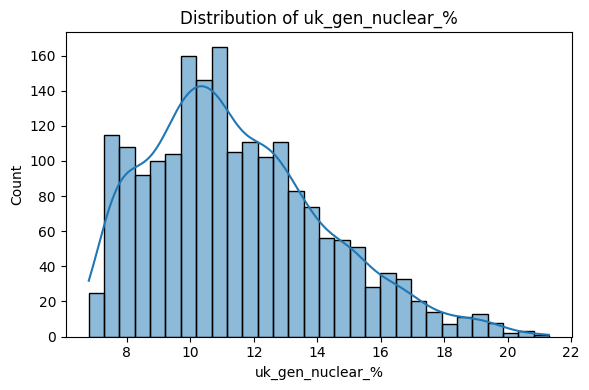

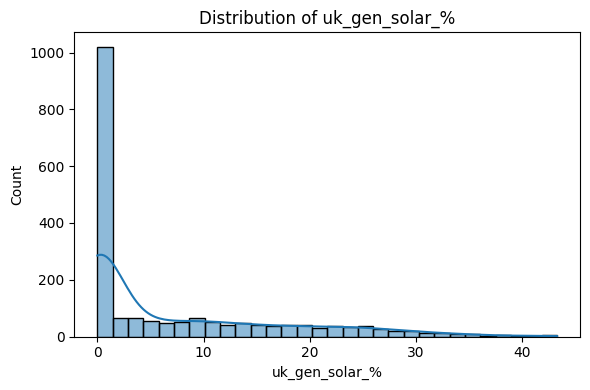

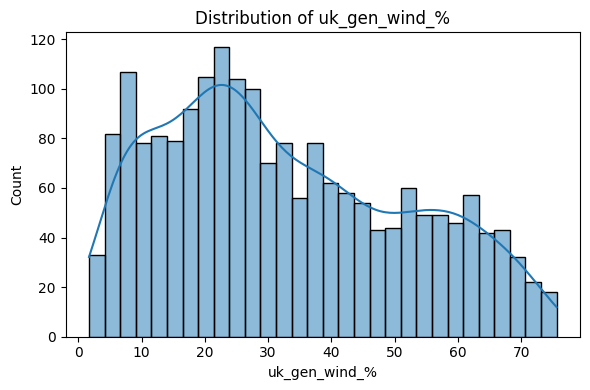

In [14]:
features_to_plot = (
    df.columns.drop("datetime") if "datetime" in df.columns else df.columns
)
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [18]:
# Drop datetime and carbon_index safely (if they exist)
cols_to_drop = ["datetime", "carbon_index"]
features_to_plot = df.columns.drop([col for col in cols_to_drop if col in df.columns])

# Compute skewness only on numeric columns
skewness = (
    df[features_to_plot]
    .select_dtypes(include="number")
    .skew()
    .sort_values(ascending=False)
)

print(skewness)

# POSTIVE SKEWNESS
# A positive skewness value (greater than 0) indicates that the right tail of the distribution
# is longer or heavier than the left tail. This often means the mean is greater than the median,
# and the median is greater than the mode. Outliers tend to be on the right side of the distribution.

# NEGATIVE SKEWNESS
# A negative skewness value (less than 0) indicates that the left tail of the distribution is longer or heavier
# than the right tail. This often means the mean is less than the median, and the median is less than the mode.
# Outliers tend to be on the left side of the distribution

so2                          2.213798
pm2_5                        1.926804
co                           1.860921
no2                          1.856735
pm10                         1.738893
solar_radiation_Wm2          1.392673
uk_gen_solar_%               1.314091
aqi_us                       1.175848
uk_gen_nuclear_%             0.668523
uk_gen_gas_%                 0.598375
temperature_C                0.587375
wind_speed_mps               0.489226
carbon_intensity_actual      0.473006
carbon_intensity_forecast    0.453930
uk_gen_wind_%                0.410984
retail_price_£_per_kWh       0.265690
uk_gen_imports_%             0.173138
uk_gen_biomass_%             0.026312
o3                          -0.051510
humidity_%                  -0.557692
cloud_cover_%               -0.899775
dtype: float64


In [ ]:
log_features = [
    "so2",  # 2.21
    "pm2_5",  # 1.93
    "co",  # 1.86
    "no2",  # 1.86
    "pm10",  # 1.74
    "solar_radiation_Wm2",  # 1.39
    "uk_gen_solar_%",  # 1.31
    "aqi_us",  # 1.18
]

for col in log_features:
    df[f"log_{col}"] = np.log1p(df[col])

In [ ]:
# Original features (low/moderate skew)
scale_features = [
    "temperature_C",  # 0.59 - moderate
    "wind_speed_mps",  # 0.49 - moderate
    "carbon_intensity_actual",  # 0.47 - moderate
    "carbon_intensity_forecast",  # 0.45 - moderate
    "uk_gen_wind_%",  # 0.41 - low
    "uk_gen_imports_%",  # 0.17 - low
    "uk_gen_biomass_%",  # 0.03 - low
    "o3",  # -0.05 - low
    "humidity_%",  # -0.56 - moderate (negative)
    "cloud_cover_%",  # -0.90 - moderate (negative)
    "uk_gen_nuclear_%",  # 0.67 - moderate
    "uk_gen_gas_%",  # 0.60 - moderate
]

# Log-transformed features
scale_features += [
    "log_so2",
    "log_pm2_5",
    "log_co",
    "log_no2",
    "log_pm10",
    "log_solar_radiation_Wm2",
    "log_uk_gen_solar_%",
    "log_aqi_us",
]

scaler = StandardScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df[scale_features]),
    columns=[f"scaled_{col}" for col in scale_features],
    index=df.index,
)